<a href="https://colab.research.google.com/github/paucaroscanoa/Series-de-Tiemop---UNI/blob/master/Suvizaci%C3%B3n_Serie_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

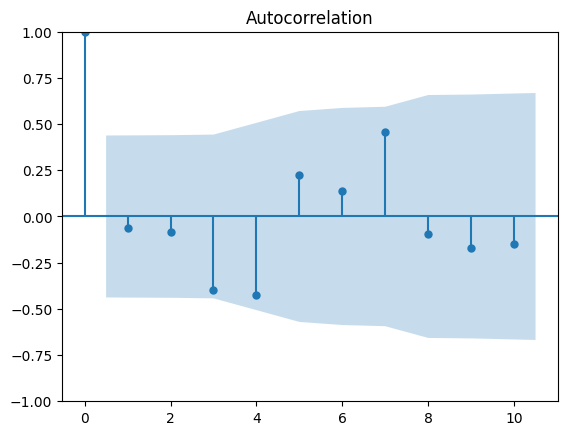

array([ 1.        , -0.0630926 , -0.08380538, -0.39649024, -0.42365333,
        0.22452185])

In [ ]:
#----------------------Librerias ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

#-----------lectura de datos--------------------------------------------
datos = pd.read_excel('/content/sample_data/Datos.xlsx',index_col=0)
#-----------------------------------------------------------------------

#-----Función de Autocorrelación - Autocorrelación Parcial---------------
datos1=datos.copy()
acf_values = sm.tsa.acf(datos1['Ventas'], nlags=5)
fig = sm.graphics.tsa.plot_acf(datos1['Ventas'], lags=10)
plt.show()
acf_values

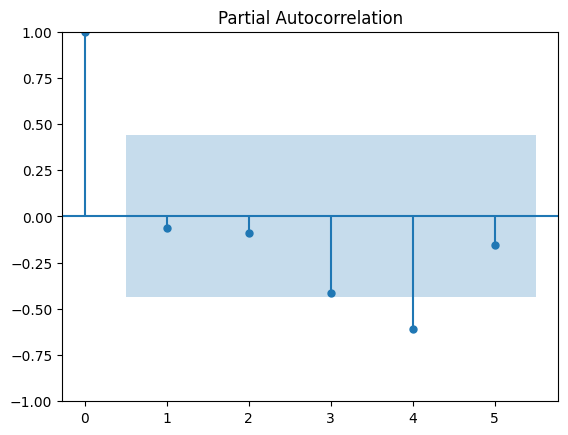

array([ 1.        , -0.0630926 , -0.0881369 , -0.41263981, -0.61107938,
       -0.15513398])

In [ ]:
#----------------------Librerias ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

#-----------lectura de datos--------------------------------------------
datos2 = pd.read_excel('/content/sample_data/Datos.xlsx',index_col=0)
#-----------------------------------------------------------------------

#-----Función de Autocorrelación - Autocorrelación Parcial---------------

pacf_values = sm.tsa.pacf(datos2['Ventas'], nlags=5,method = ('ywmle'))
fig = sm.graphics.tsa.plot_pacf(datos2['Ventas'], lags=5, method = ('ywmle'))
plt.show()
pacf_values

Error Cuadrático Medio: 1.706081696852861


<Axes: xlabel='t'>

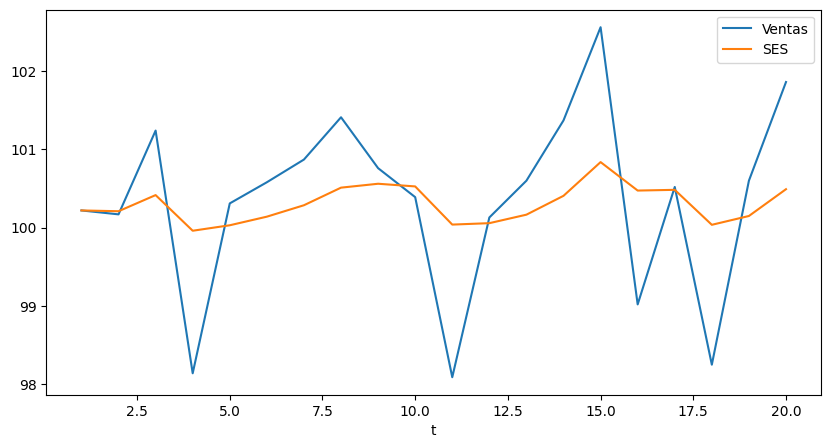

In [ ]:
#----------------------Librerias ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

#-----------lectura de datos--------------------------------------------
datos = pd.read_excel('/content/sample_data/Datos.xlsx',index_col=0)
# ---------------Error cuadrático medio --------------------------------
def mse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.square(np.subtract(actual, pred)))
#-----------------------------------------------------------------------
#-------------Suavización Exponencial------------------------------------
ventas_1=datos.copy()
alfa=0.2
ventas_1['SES']=ventas_1['Ventas'].ewm(alpha=alfa,adjust=False).mean()
error = mse(ventas_1['Ventas'].iloc[1:], ventas_1['SES'].iloc[:-1])
print(f'Error Cuadrático Medio: {error}')
ventas_1.plot(figsize=(10,5))

In [57]:
#----------------------Librerias ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#-----------lectura de datos--------------------------------------------
datos = pd.read_excel('/content/sample_data/Datos.xlsx',index_col=0)
# ---------------Error cuadrático medio --------------------------------
def mse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.square(np.subtract(actual, pred)))

#---------------Media Movil Simple -------------------------------------
ventas = datos.copy()

orden=3
ventas['MMS-orden']=ventas['Ventas'].rolling(orden).mean()
ventas= ventas.dropna()
error = mse(ventas['Ventas'].iloc[1:], ventas['MMS-orden'].iloc[:-1])
print(f'Error Cuadrático Medio: {error}')
fig = px.line(ventas, x=ventas.index,y=ventas['Ventas'], title = "Media Movil Simple", markers = True)

fig.show()


Error Cuadrático Medio: 2.526696078431373


# Nueva sección